# ARTIFICIAL NUERAL NETWORKS

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.3.0'

In [2]:
keras.__version__

'2.4.0'

In [48]:
%matplotlib inline

# LOADING THE DATASETS
<p1>Loading the in-built MNIST tensorflow dataset</p1><br><hr>

In [3]:
mnist=keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

<p1>Creating validation sets</p1>

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
y_train[0]

7

<p1>Creating Class names</p1>

In [6]:
class_names = ["Zero","One", "Two", "Three", "Four", "Five","Six", "Seven", "Eight", "Nine"]
class_names[y_train[0]]

'Seven'

# Creating an actual artificial neural network

In [7]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

### Naming all the layers 

In [10]:
model.layers[1].name

'dense'

In [11]:
model.layers[2].name

'dense_1'

In [12]:
model.layers[3].name

'dense_2'

In [13]:
import pydot

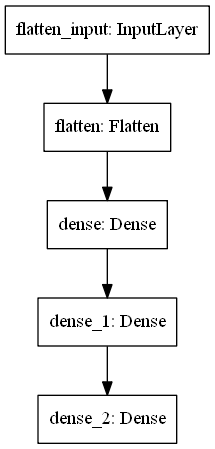

In [14]:
keras.utils.plot_model(model)

# Information about weights and biases

In [16]:
weights, biases = model.layers[1].get_weights()

In [17]:
weights

array([[-0.06578124, -0.05125482, -0.00451858, ..., -0.04748649,
         0.00144432, -0.03927432],
       [-0.02362489, -0.04932393,  0.00639497, ..., -0.0722834 ,
        -0.0463317 , -0.05782803],
       [-0.03742034,  0.01618464, -0.07237055, ..., -0.05248122,
         0.04841013,  0.05705893],
       ...,
       [-0.01542118, -0.03387843, -0.01903197, ...,  0.05091144,
         0.00866029, -0.05889758],
       [ 0.06900609, -0.04996044, -0.01445903, ...,  0.04948407,
        -0.06236921, -0.02199767],
       [-0.05593375,  0.05279079, -0.04802707, ...,  0.06071134,
        -0.06539407,  0.06295532]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

# Compiling the model with a loss function and optimizer and an additional accuracy score

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

# Fitting Data to our model

In [22]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6116 - accuracy: 0.8416 - val_loss: 0.3036 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.9184 - val_loss: 0.2361 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.9342 - val_loss: 0.1995 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1947 - accuracy: 0.9448 - val_loss: 0.1715 - val_accuracy: 0.9524
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1702 - accuracy: 0.9517 - val_loss: 0.1554 - val_accuracy: 0.9582
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1513 - accuracy: 0.9570 - val_loss: 0.1416 - val_accuracy: 0.9622
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1358 - accuracy: 0.9615 - val_loss: 0.1315 - val_accuracy:

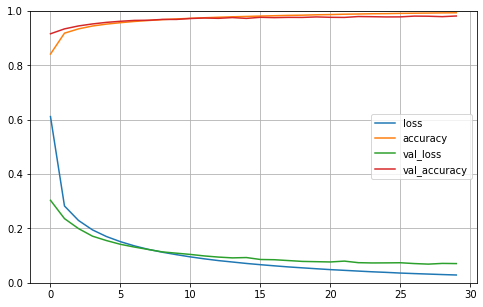

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

# Evaluating our model

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 13.8654 - accuracy: 0.9739


[13.865413665771484, 0.9739000201225281]

# Probabilities of class predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Making actual predictions

In [29]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
np.array(class_names)[y_pred]

array(['Seven', 'Two', 'One'], dtype='<U5')

In [40]:
import numpy as np
np.array(class_names)[y_test[0:3]]

array(['Seven', 'Two', 'One'], dtype='<U5')

<p>Therefore it correctly classified three images from the test set</p>

In [43]:
X_test[0].

(28, 28)

# Displaying pictures from Test set

In [44]:
from PIL import Image

In [50]:
img = Image.fromarray(X_test[0])


In [51]:
from matplotlib.pyplot import imshow

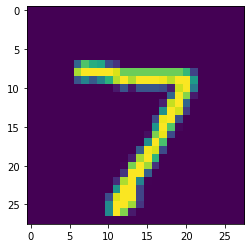

In [52]:
imshow(np.asarray(img))

In [56]:
np.array(class_names)[y_pred[0]]

'Seven'

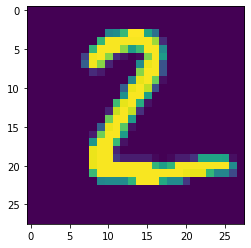

In [53]:
img = Image.fromarray(X_test[1])
imshow(np.asarray(img))

In [55]:
np.array(class_names)[y_pred[1]]

'Two'

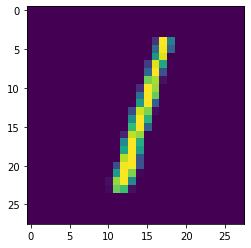

In [54]:
img = Image.fromarray(X_test[2])
imshow(np.asarray(img))

In [57]:
np.array(class_names)[y_pred[2]]

'One'

# As you can see the models predictions are pretty convincing

# Thank You